In [1]:
import kye as kye
import numpy as np
import importlib
import plotly.express as px
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import re
import spacy as sp
from requests.adapters import HTTPAdapter
from urllib3.util import Retry
from tqdm.notebook import tqdm

In [2]:
# !python -m spacy download en_core_web_sm

In [3]:
import gdeltdoc as gdd

In [69]:
from gdeltdoc import Filters, GdeltDoc, near

keyword = "Ukraine"

f = gdd.Filters(
    start_date="2020-02-01",
    end_date="2024-09-01",
    num_records=250,
    keyword=keyword,
    domain="guardian.com",
    # near = near(10, "arrest", "charge"),
)
gd = gdd.GdeltDoc()

In [70]:
f = gdd.Filters(
    start_date="2020-02-01",
    end_date="2024-09-01",
    num_records=250,
    keyword=keyword,
    domain="sputnikglobe.com",
    # near = near(10, "arrest", "charge"),
)

In [71]:
art_df = gd.article_search(f)
art_df.shape

(250, 8)

In [74]:
importlib.reload(kye)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<module 'kye' from 'f:\\repos\\GDeltExplore\\kye.py'>

In [75]:
g = kye.entity_graph(art_df, html_tags={"class":"article__text"})
sent_df = kye.sentiment_analyser(art_df)

100%|██████████| 250/250 [05:13<00:00,  1.25s/it]


PERSON People, including fictional
NORP Nationalities or religious or political groups
FACILITY Buildings, airports, highways, bridges, etc.
ORGANIZATION Companies, agencies, institutions, etc.
GPE Countries, cities, states
LOCATION Non-GPE locations, mountain ranges, bodies of water
PRODUCT Vehicles, weapons, foods, etc. (Not services)
EVENT Named hurricanes, battles, wars, sports events, etc.
WORK OF ART Titles of books, songs, etc.
LAW Named documents made into laws 
LANGUAGE Any named language 

In [ ]:
kye.plot_sentiments(sent_df)

In [10]:
sub_g = kye.cull_edges_by_weight(g=g, cull_below=10, ew_col="weight", trim=True)

In [66]:
importlib.reload(kye)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<module 'kye' from 'f:\\repos\\GDeltExplore\\kye.py'>

In [76]:
len(g.nodes)

352

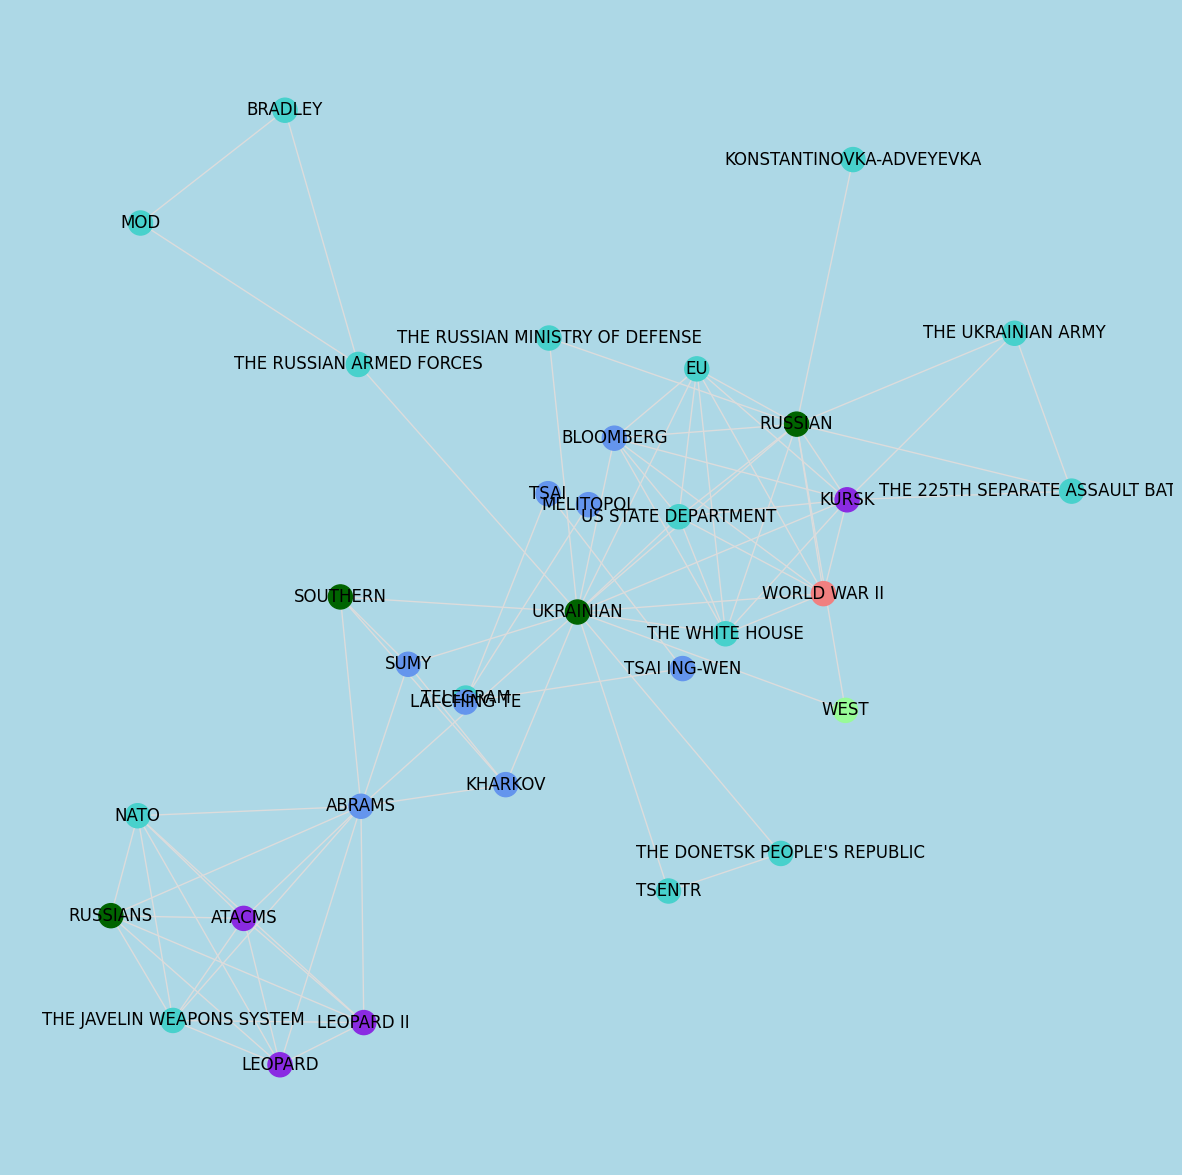

In [68]:
kye.plot_entity_graph(g)

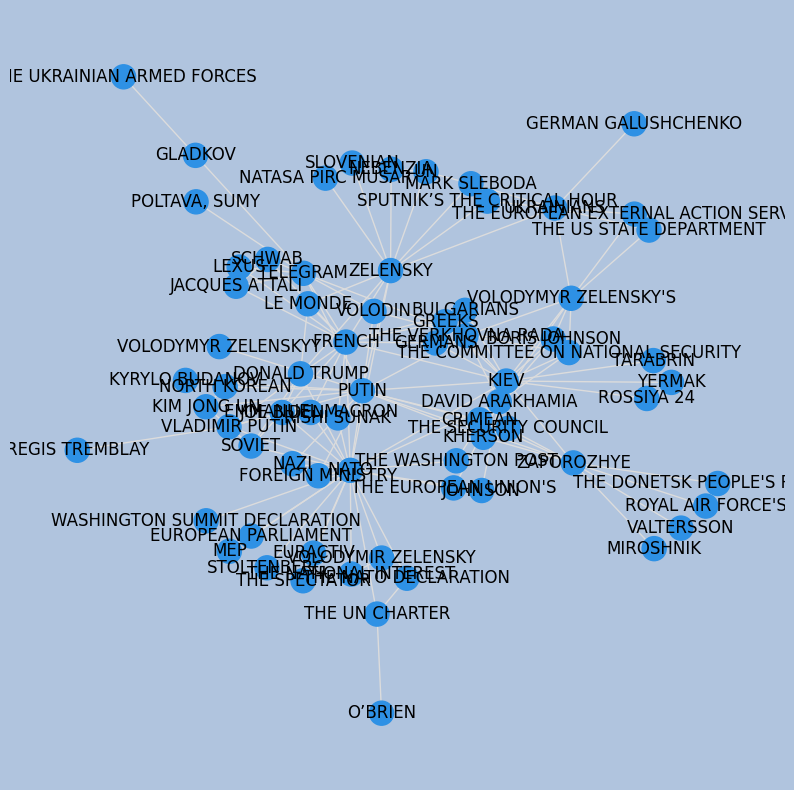

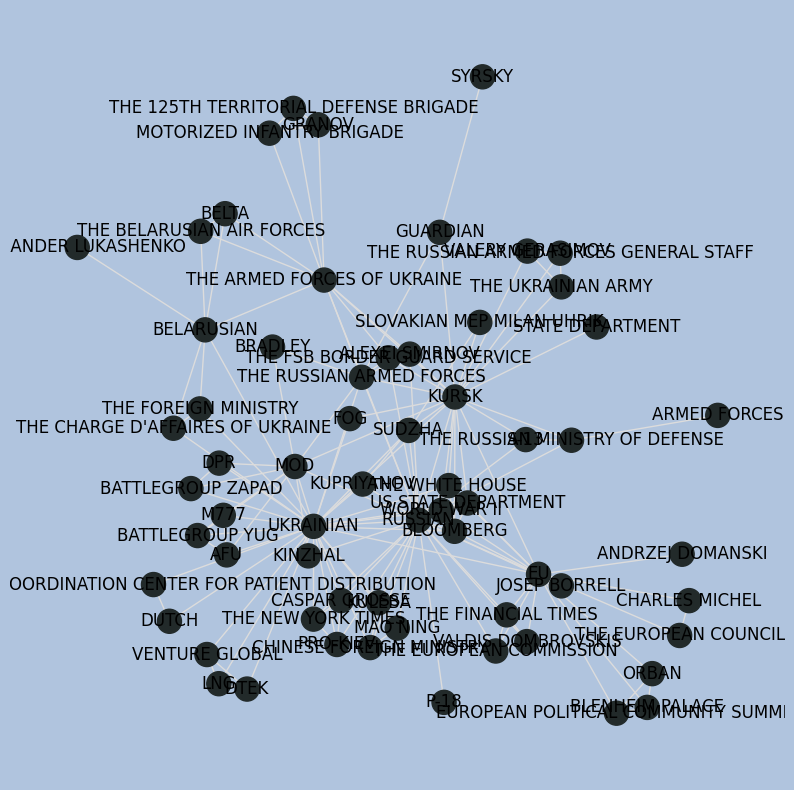

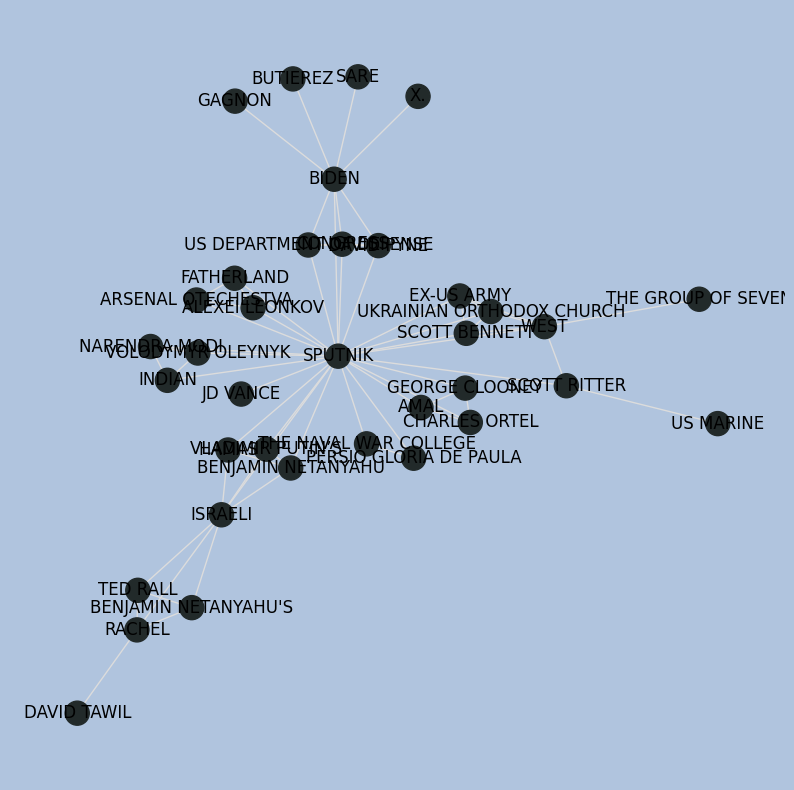

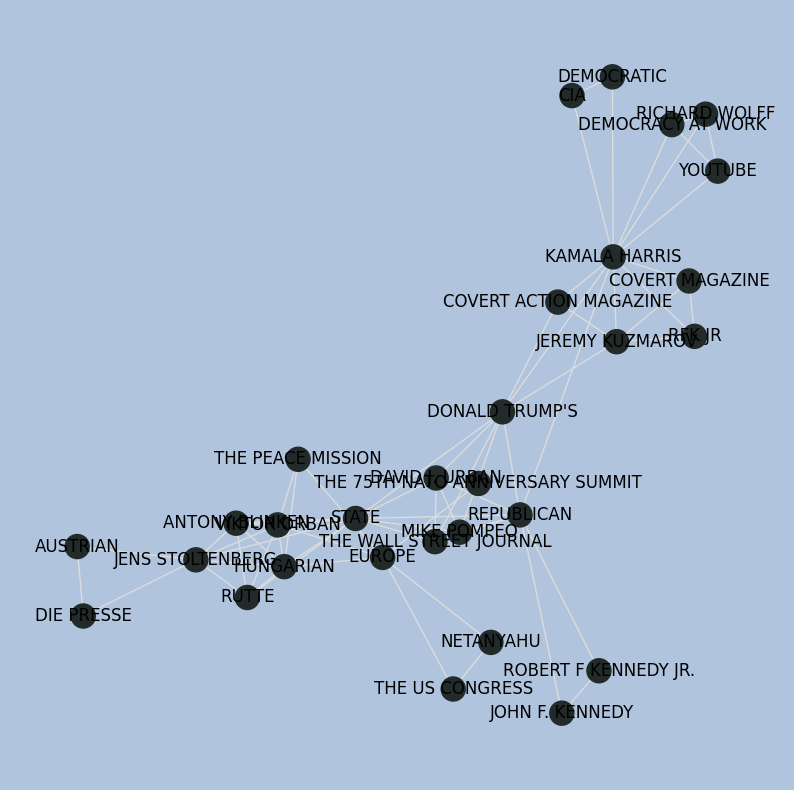

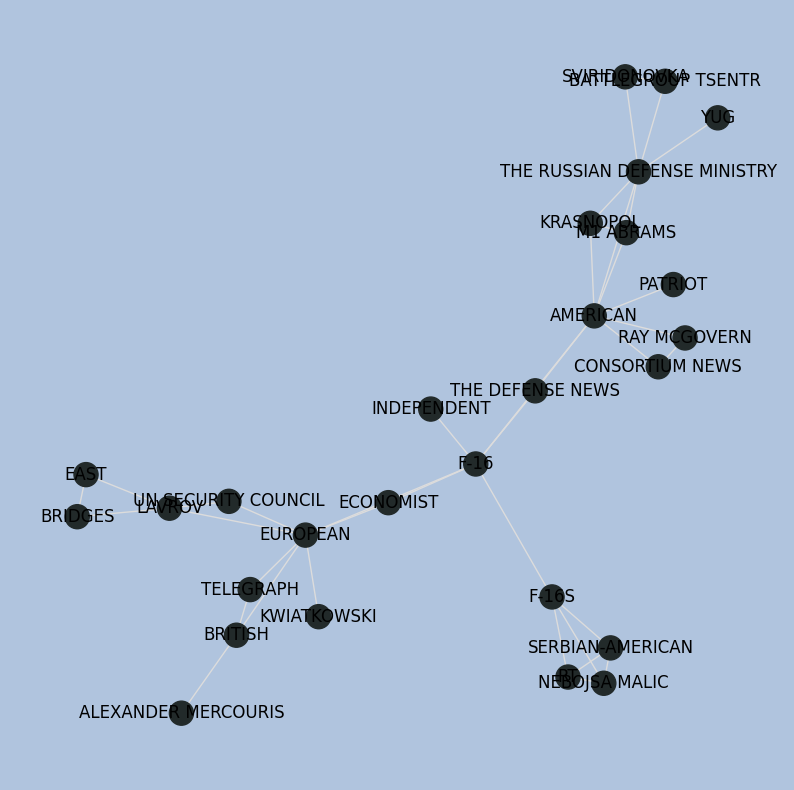

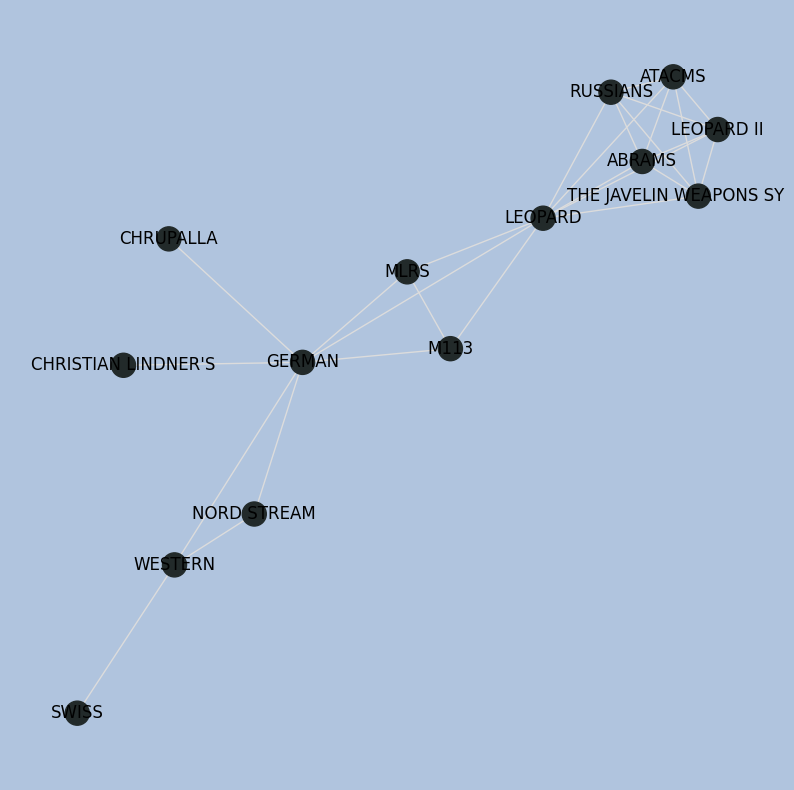

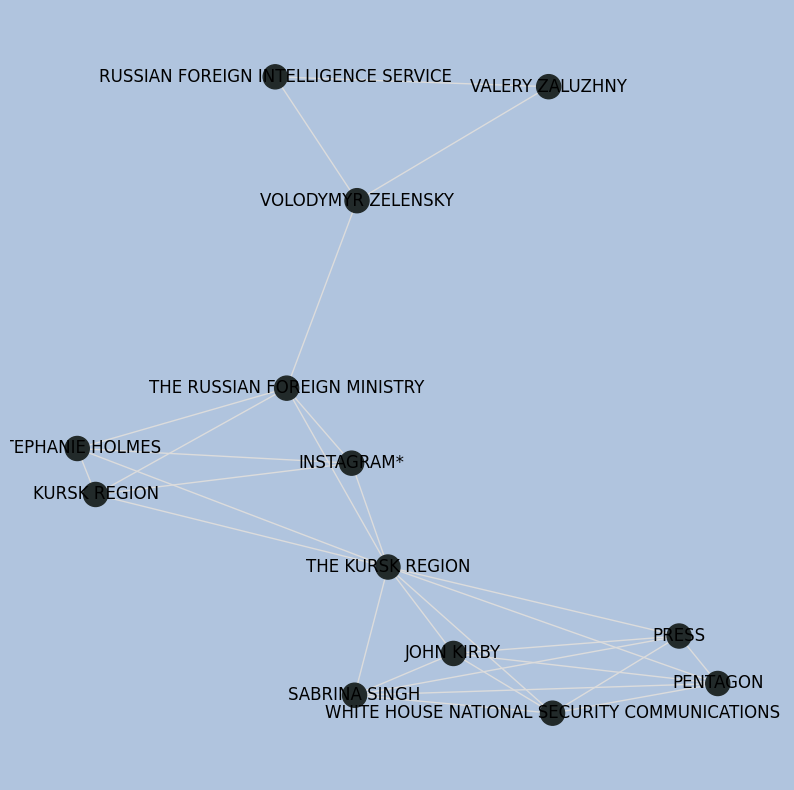

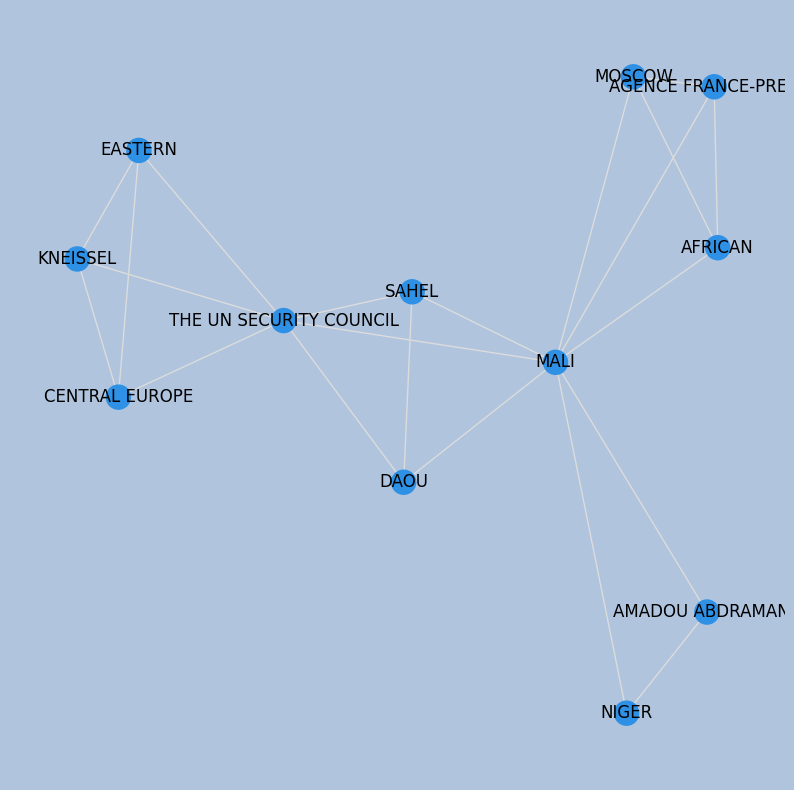

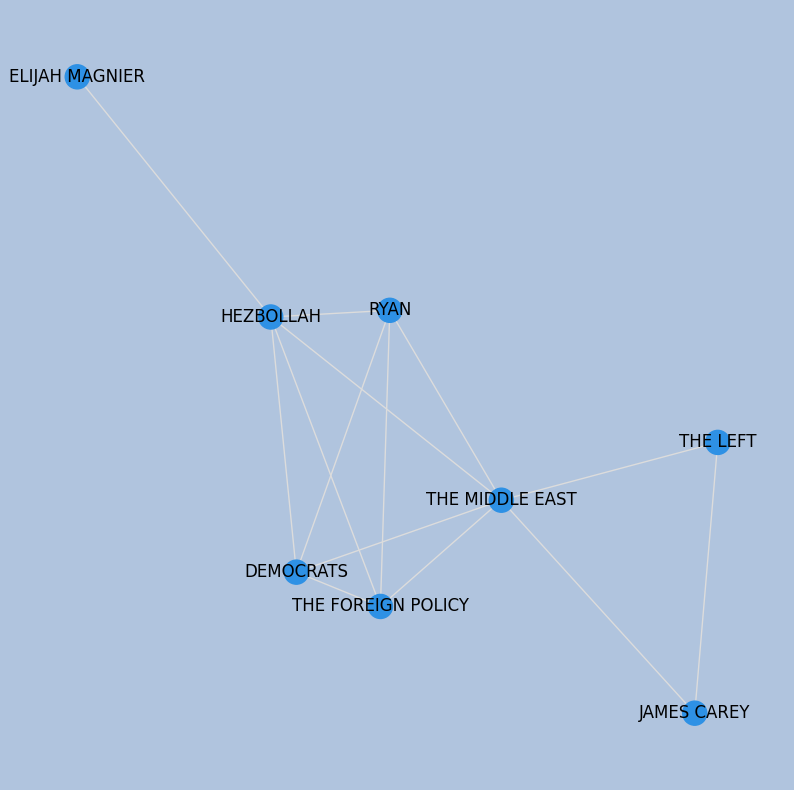

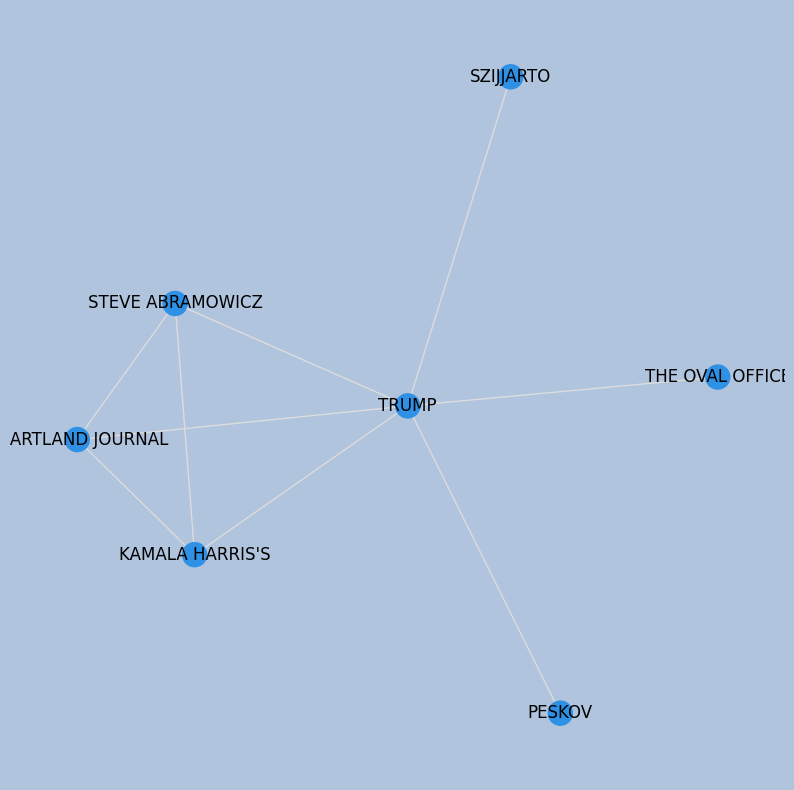

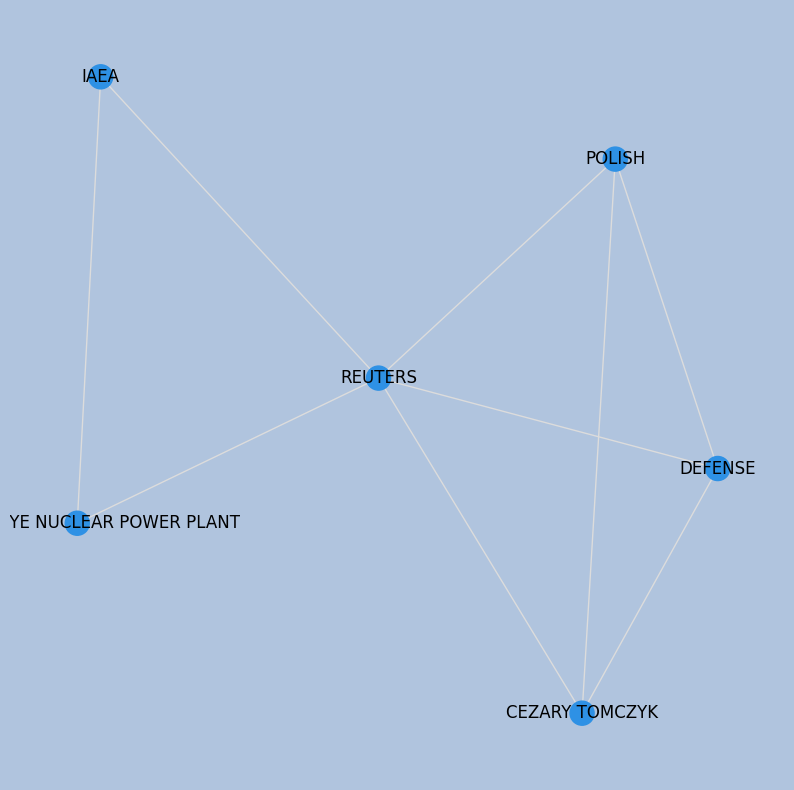

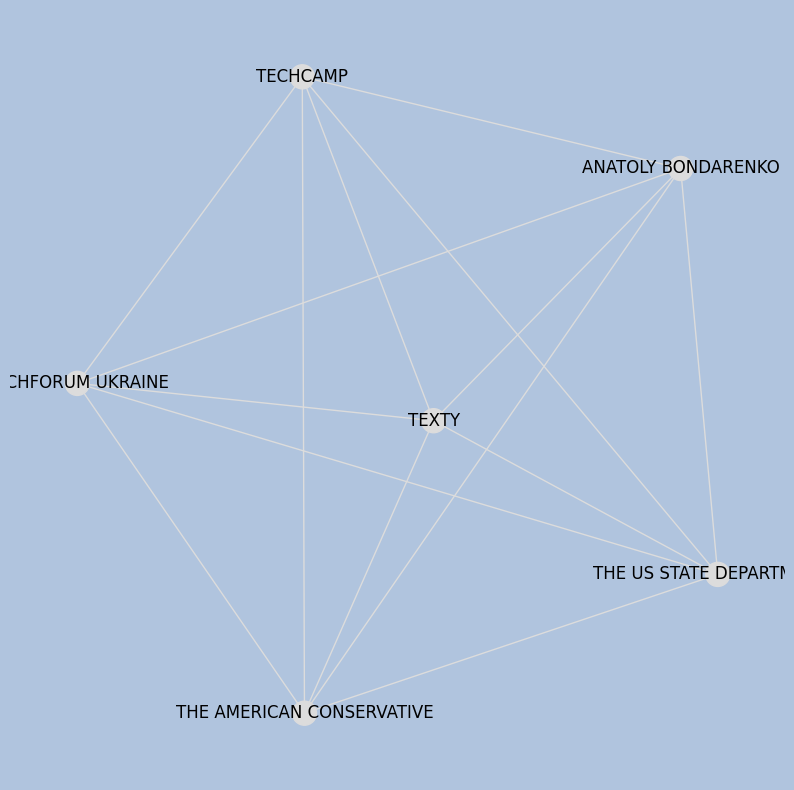

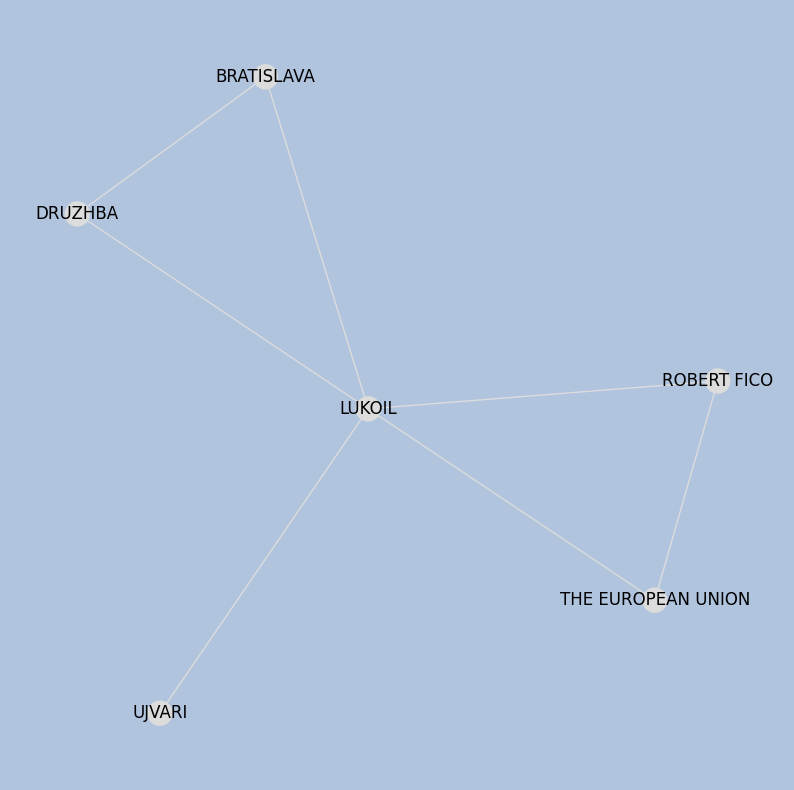

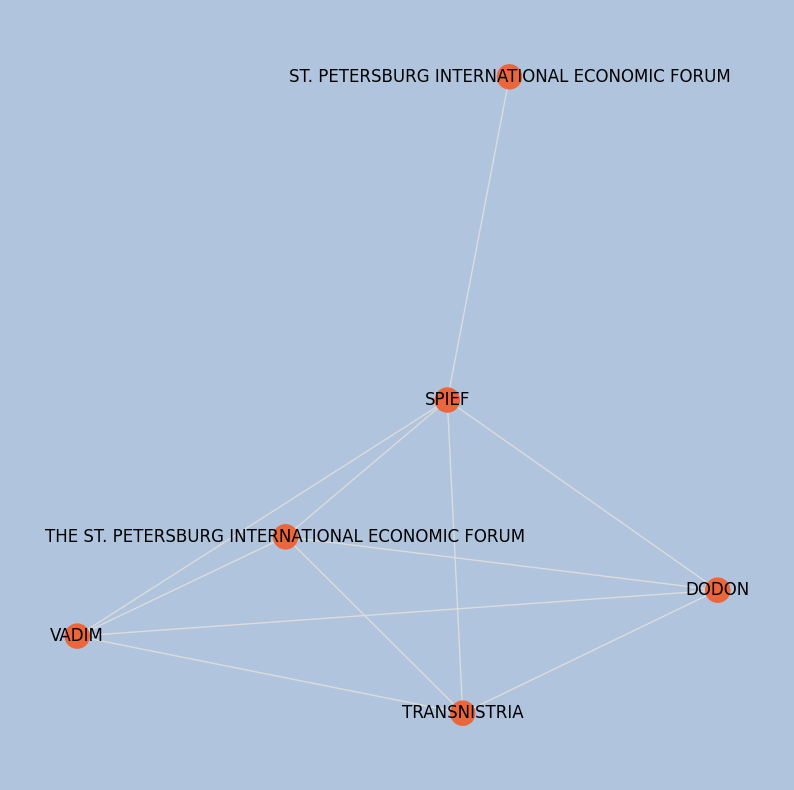

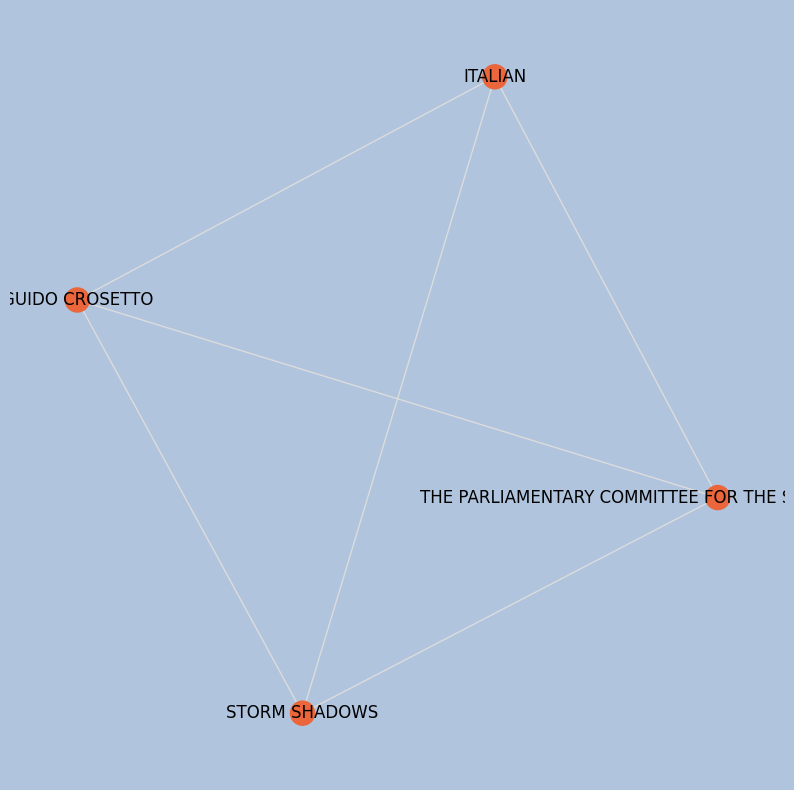

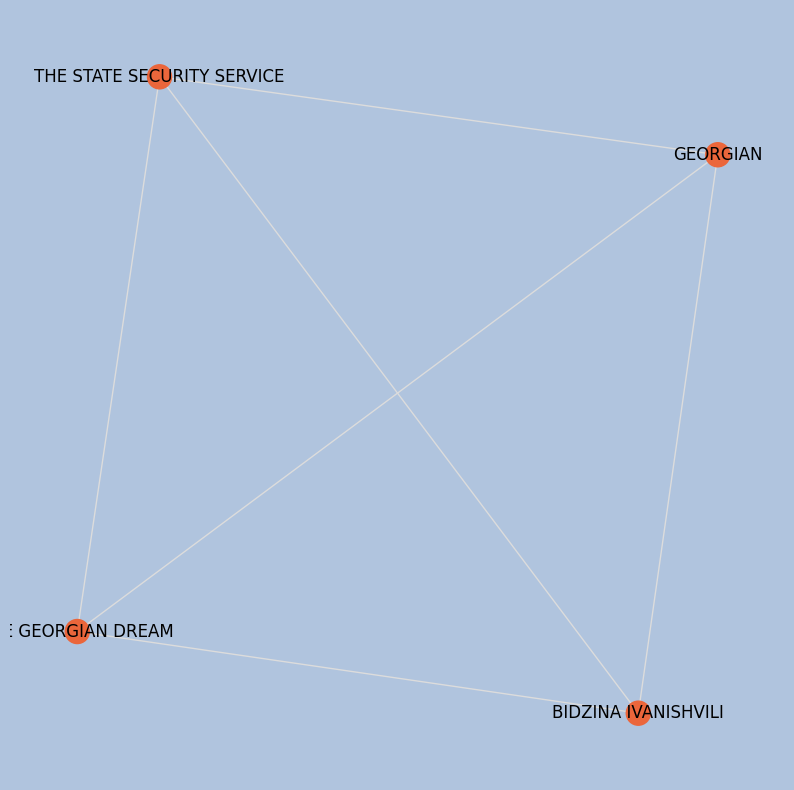

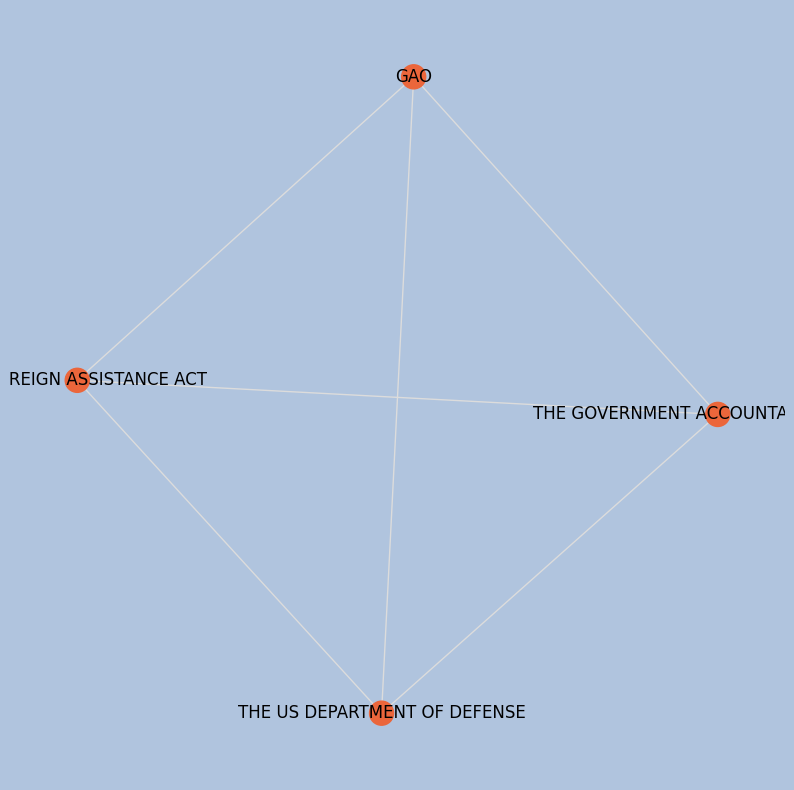

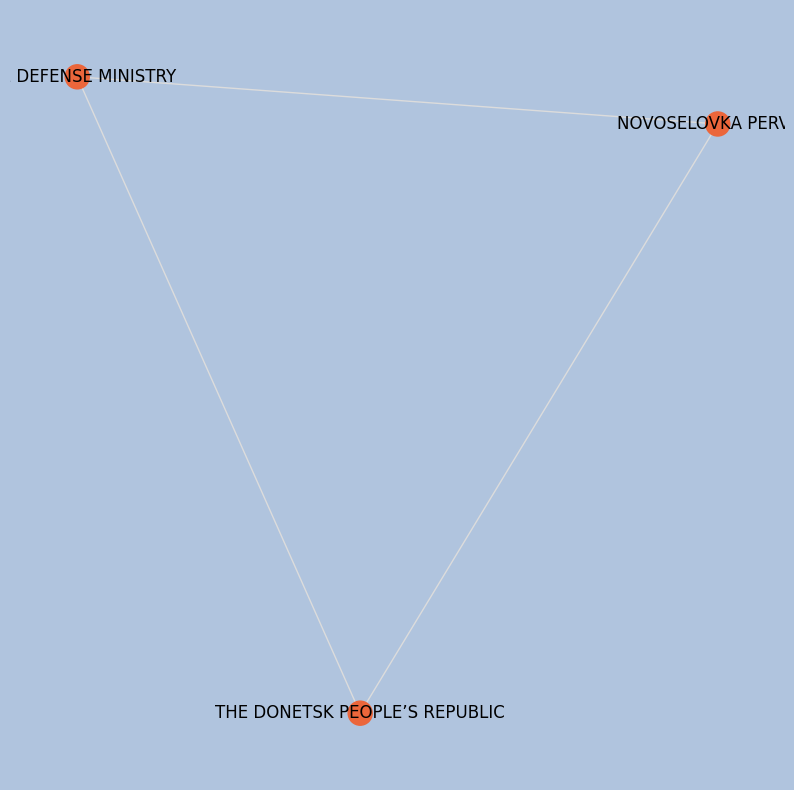

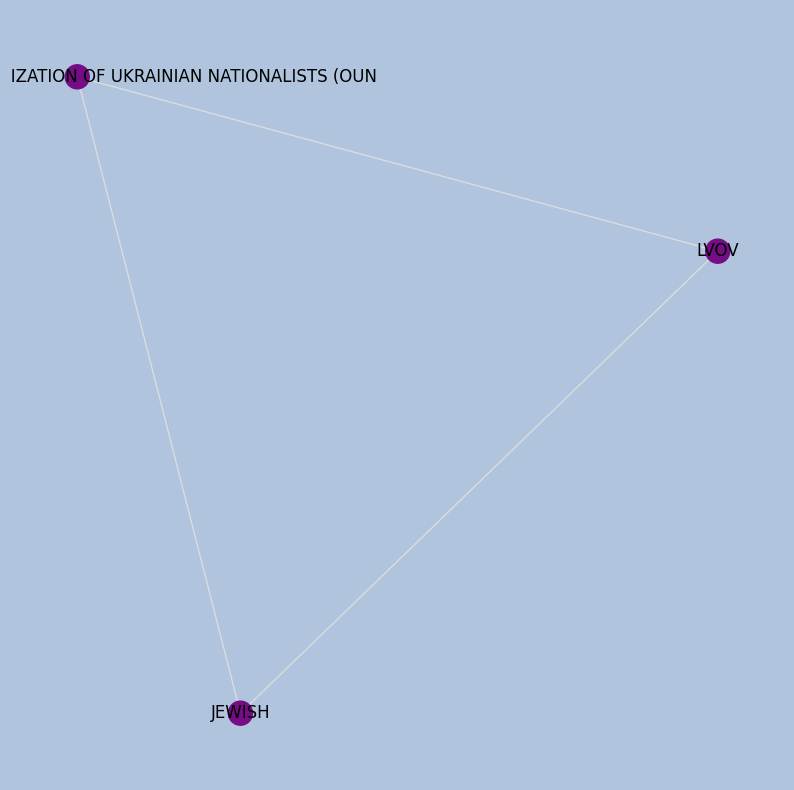

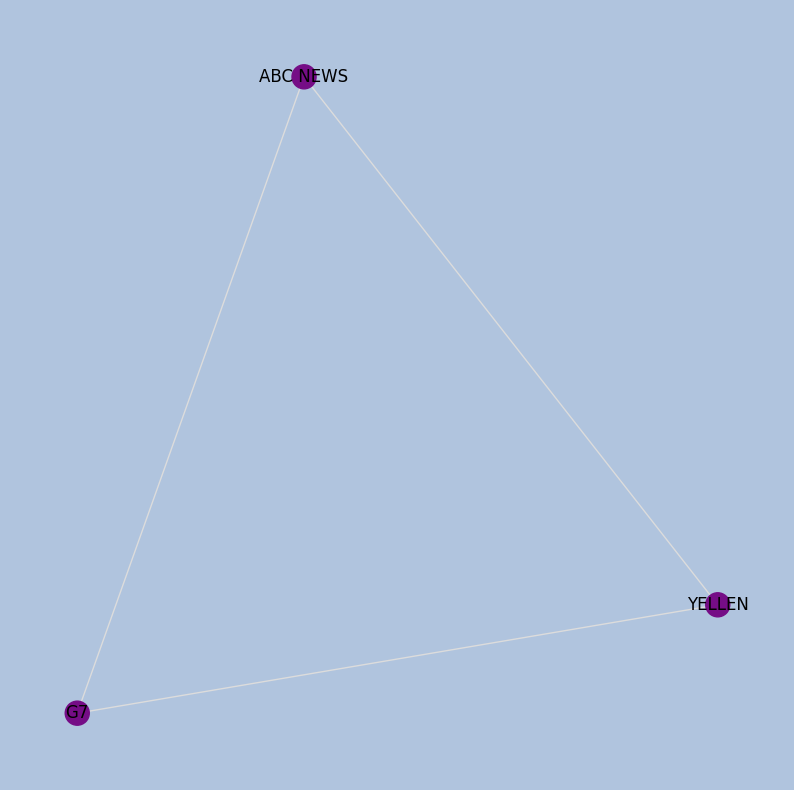

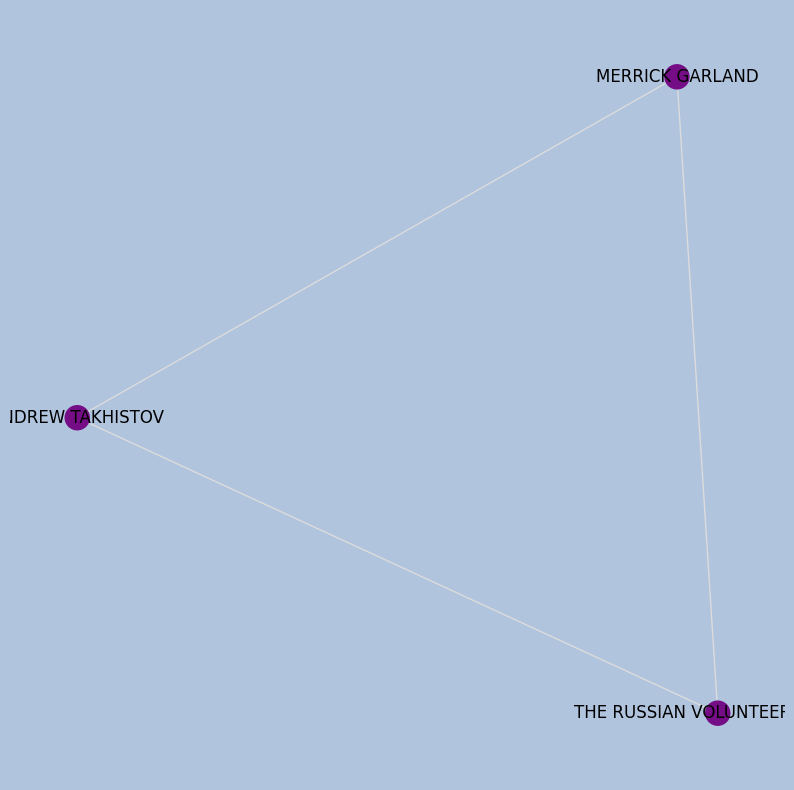

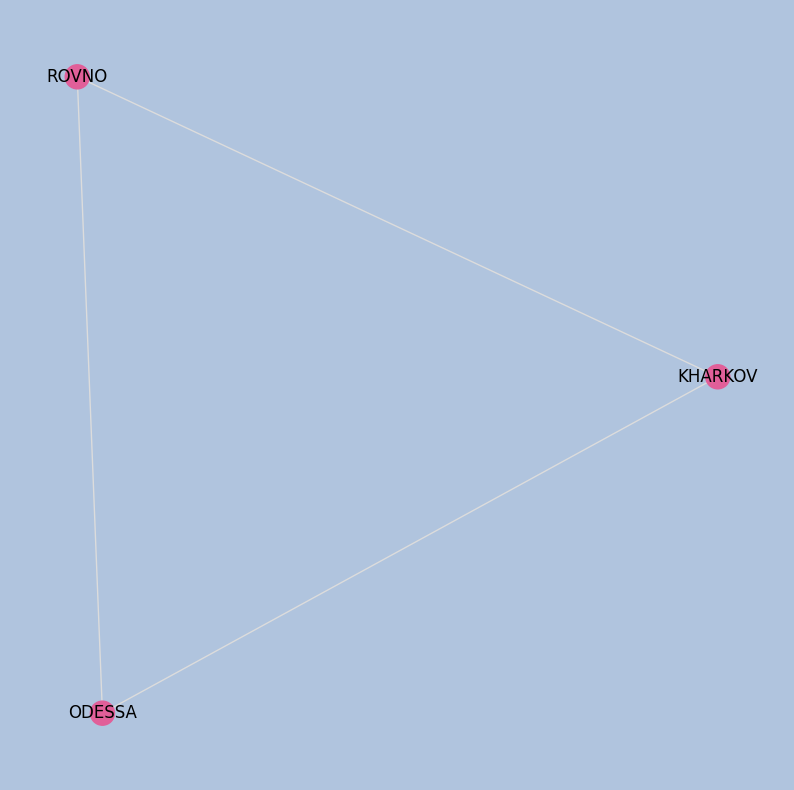

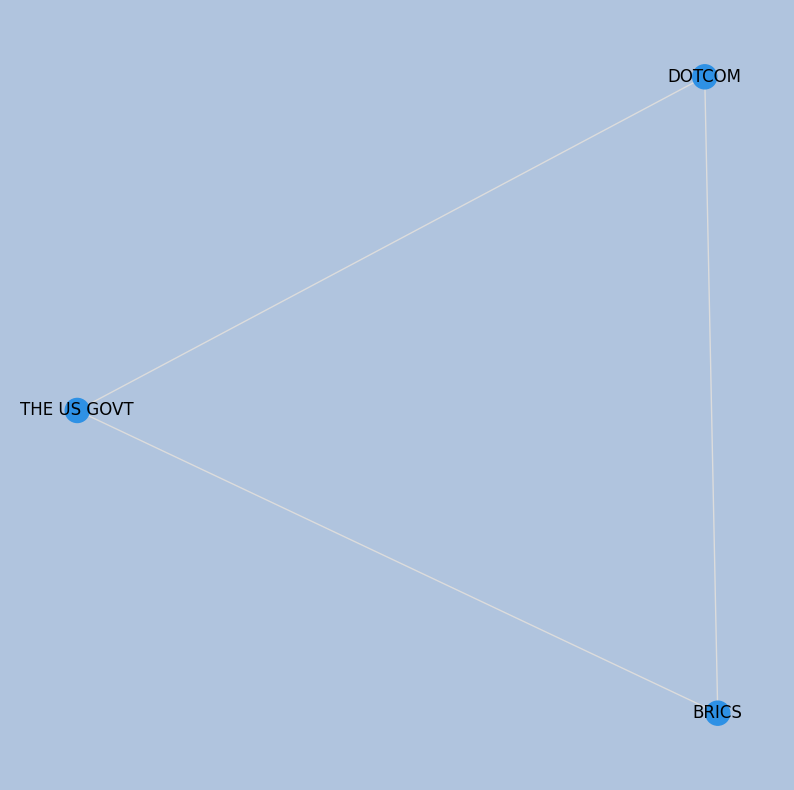

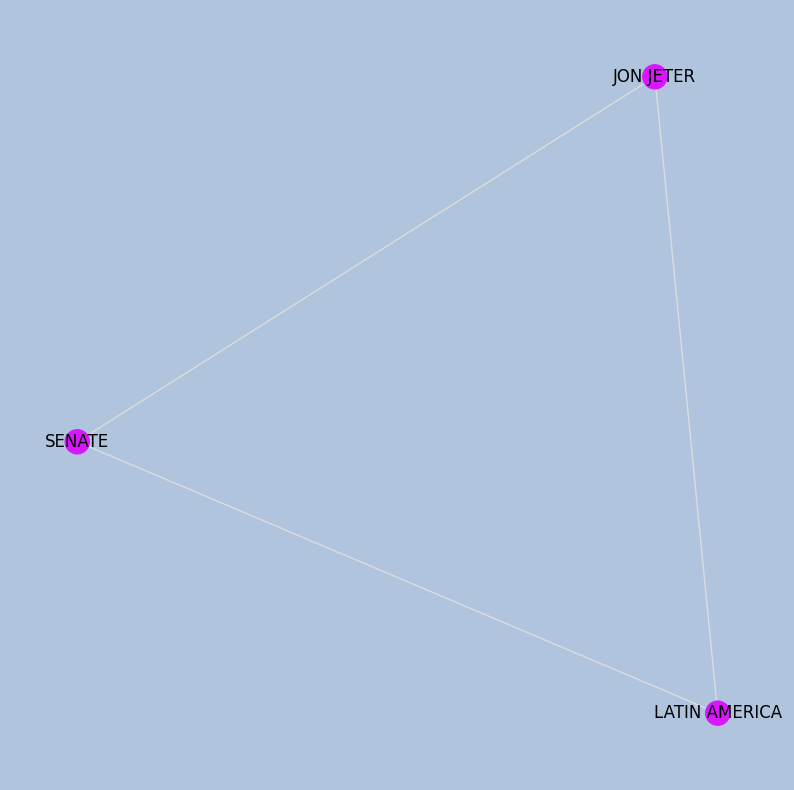

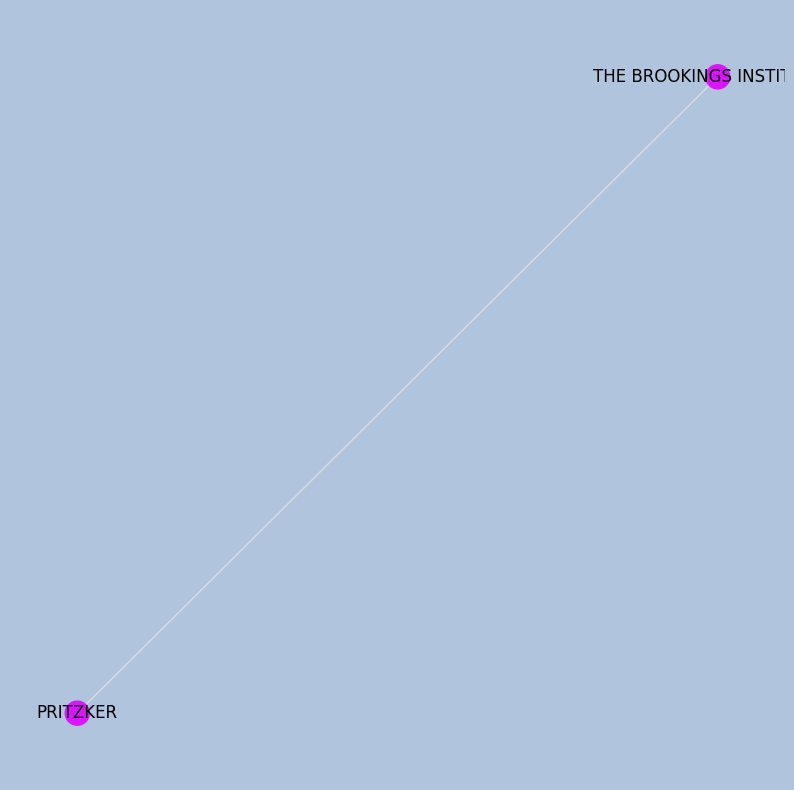

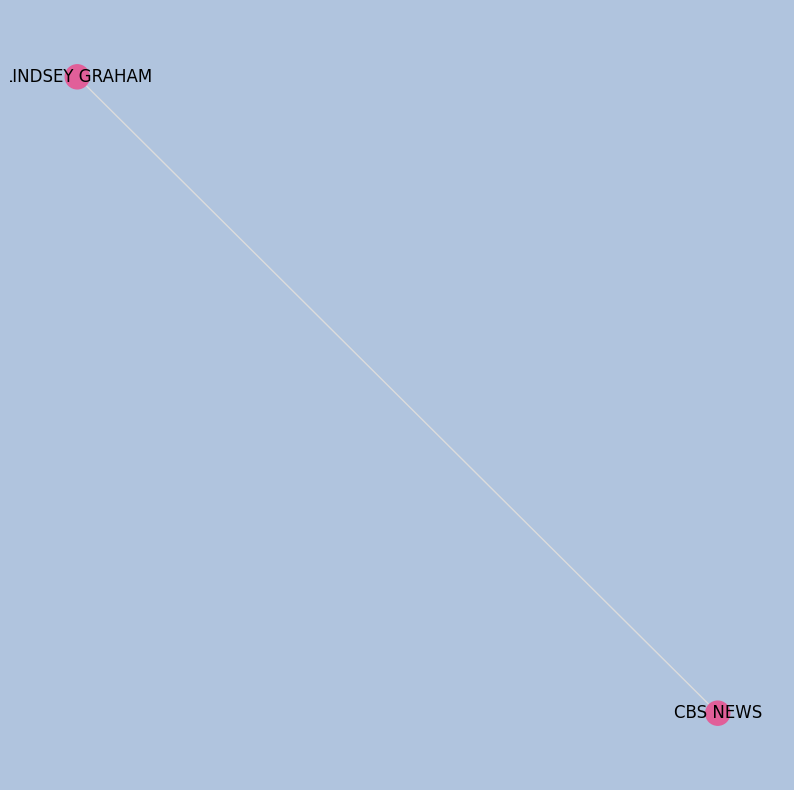

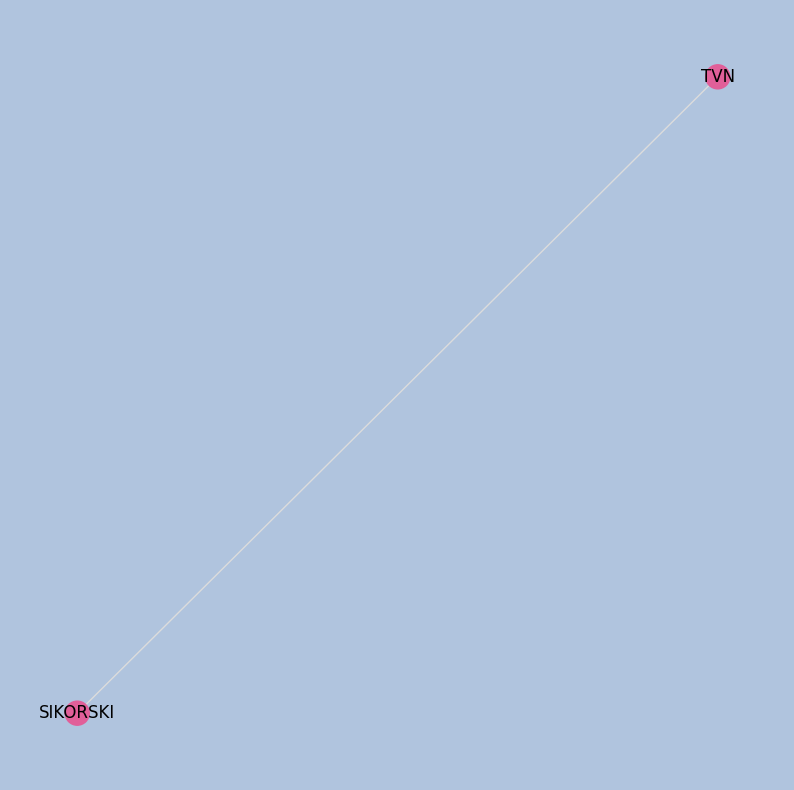

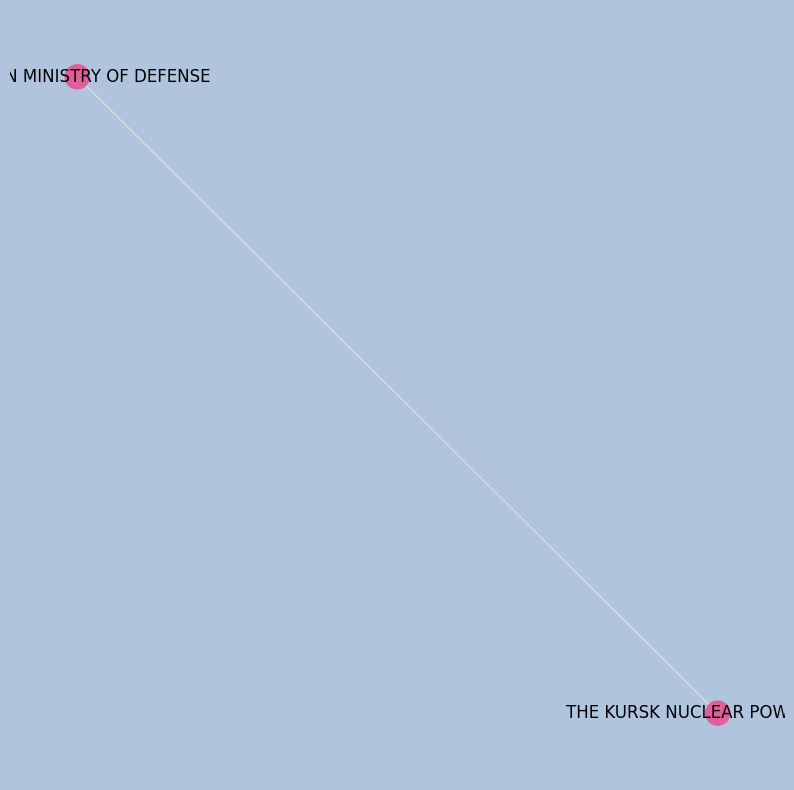

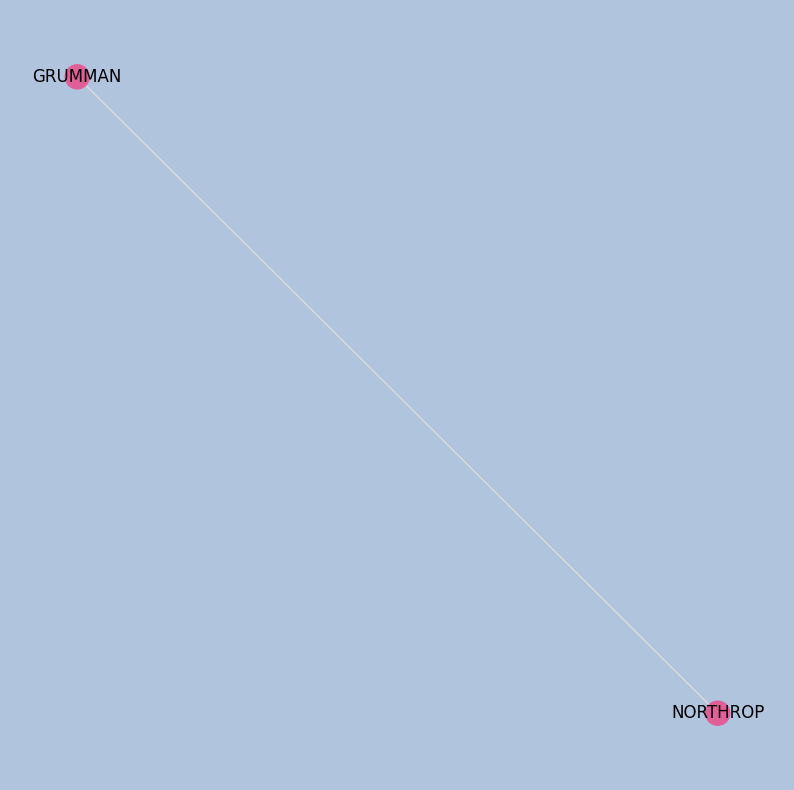

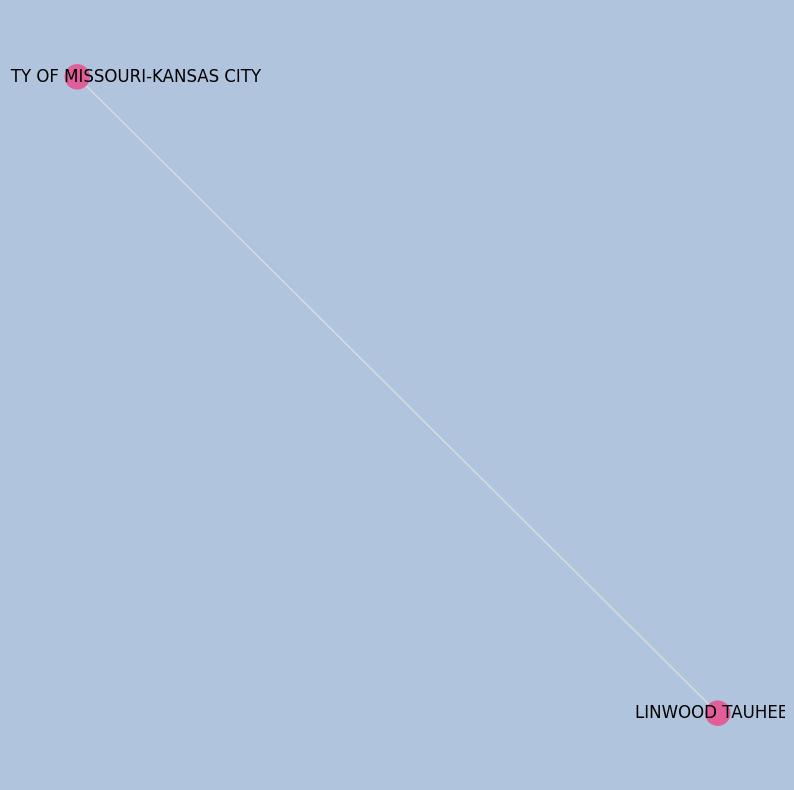

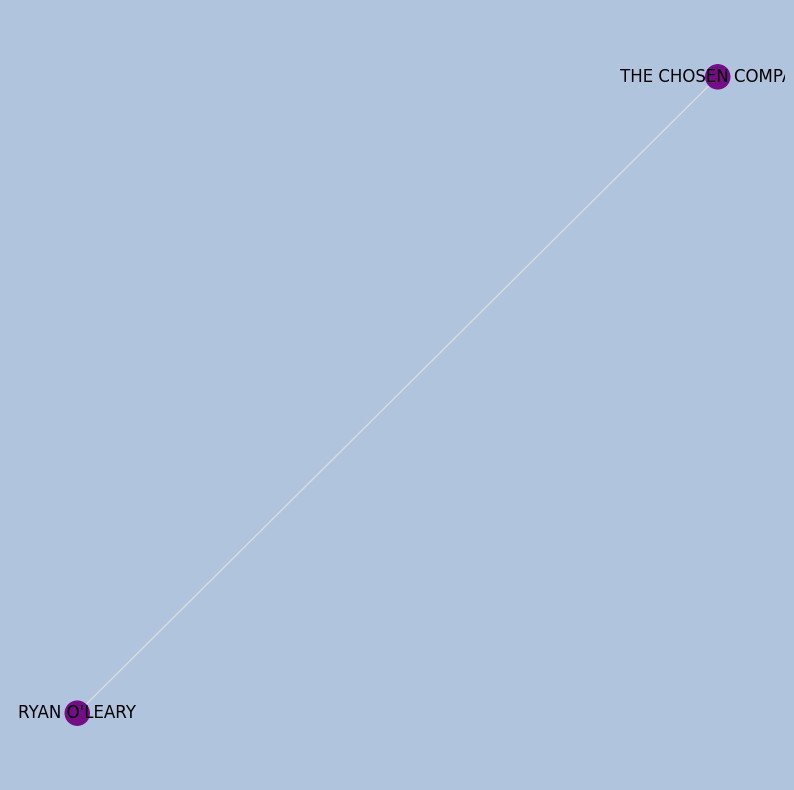

In [77]:
kye.plot_all_communities(g)